                 Stock Market Prediction

*Description - 

Stock Market Prediction is the project on technical analysis, visualization and prediction using data provided by Kaggle. By looking at data from the stock market, particularly some giant technology stocks and others. Finally looked at a few ways of analyzing the risk of a stock, based on its previous performance history.

*Business Ojective : 

    Maximise - Increase Profits
               Risk Management
               Portfolio Management

*Business Constraints :

    Minimise - Data Availability
               Model Complexity
               Uncertainity Conditions
               Regulatory Constraints

In [ ]:
#### Importing required libraries for analysis

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
## Loading the data 

df = pd.read_csv("tesla.csv")
df

,Date,Open,High,Low,Close,AdjClose,Volume
0,29/06/10,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,30/06/10,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,01/07/10,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,02/07/10,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,06/07/10,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,28/01/20,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,29/01/20,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,30/01/20,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,31/01/20,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2416 non-null   object 
 1   Open      2416 non-null   float64
 2   High      2416 non-null   float64
 3   Low       2416 non-null   float64
 4   Close     2416 non-null   float64
 5   AdjClose  2416 non-null   float64
 6   Volume    2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [5]:
df.shape

(2416, 7)

In [6]:
df.describe()

,Open,High,Low,Close,AdjClose,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [7]:
# Finding Null values
df.isna().sum()

Date        0
Open        0
High        0
Low         0
Close       0
AdjClose    0
Volume      0
dtype: int64

#### No Null Values Found in Dataset

In [8]:
# Duplicated Values
df.duplicated().sum()

0

#### No Duplicated values found

### 1st Business Moment: Measure Of Central Tendency 

In [9]:
df.mean()

Open        1.862711e+02
High        1.895782e+02
Low         1.829166e+02
Close       1.864037e+02
AdjClose    1.864037e+02
Volume      5.572722e+06
dtype: float64

In [10]:
df.median()

Open        2.130350e+02
High        2.167450e+02
Low         2.088700e+02
Close       2.129600e+02
AdjClose    2.129600e+02
Volume      4.578400e+06
dtype: float64

This Moment Speaks About The Center Of The Data Point And Indicates Where The Majority Of Data Points Lie

### 2nd Business Moment: Measure Of Dispersion
    This Moment Describes The Spread Of Data Points Around The Mean.  It Speaks About How Far 



## Variance

In [11]:
variance = np.var(df)
print(variance)

Open        1.409339e+04
High        1.460891e+04
Low         1.365004e+04
Close       1.418752e+04
AdjClose    1.418752e+04
Volume      2.486794e+13
dtype: float64


#### The values indicate how much these variables vary from their mean values. A higher variance indicates a wider range of values for that variable, while a lower variance indicates a smaller range of values.

## Standard Deviation

In [12]:
std_dev = np.std(df)
print(std_dev)

Open        1.187156e+02
High        1.208673e+02
Low         1.168334e+02
Close       1.191114e+02
AdjClose    1.191114e+02
Volume      4.986777e+06
dtype: float64


#### These values indicate how much the data points in each column deviate from the mean of that column. A higher standard deviation indicates a larger variability in the data, while a lower standard deviation indicates a smaller variability.
Indicating a relatively lower variability in these columns.

In [13]:
# converting date column in date time format using pandas
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
print(f'Dataframe contains stock prices between {df.Date.min()} {df.Date.max()}') 
print(f'Total days = {(df.Date.max()  - df.Date.min()).days} days')

Dataframe contains stock prices between 2010-01-07 00:00:00 2020-10-01 00:00:00
Total days = 3920 days


In [15]:
df.describe()

,Open,High,Low,Close,AdjClose,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


### Let's find outliers

In [16]:
import seaborn as sns

<Axes: >

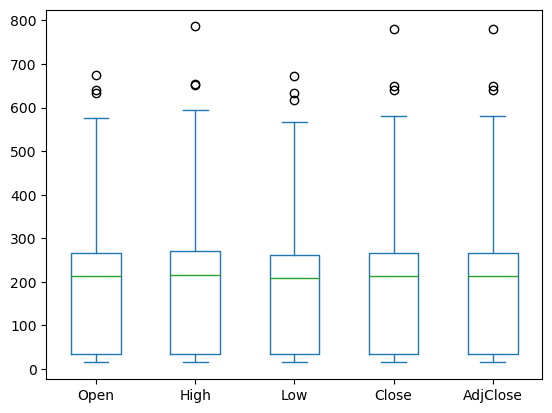

In [17]:
# ccreating box plot to check outliers
df[['Open','High','Low','Close','AdjClose']].plot(kind='box')

### Data Visualization & Count Plots

In [18]:
import matplotlib.pyplot as plt

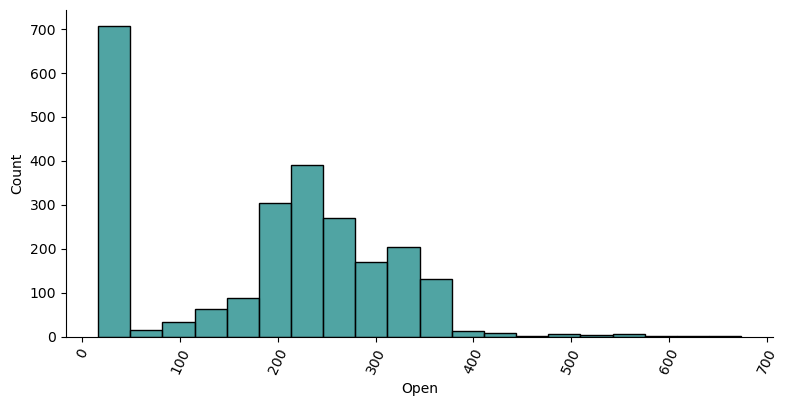

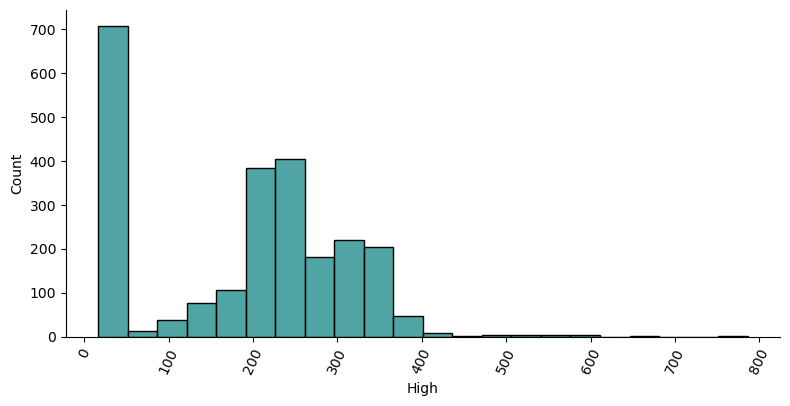

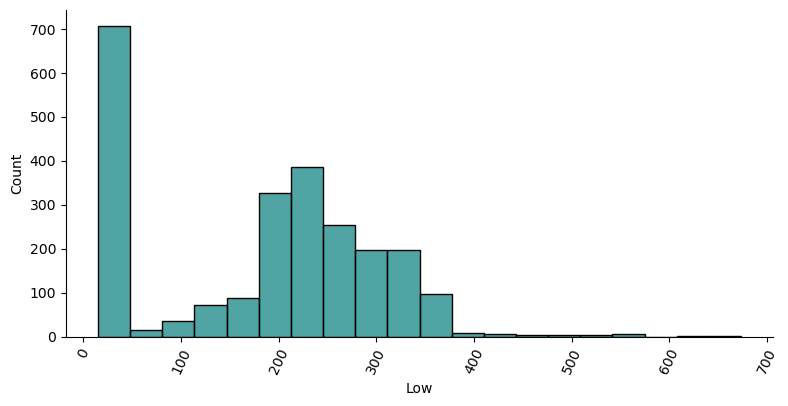

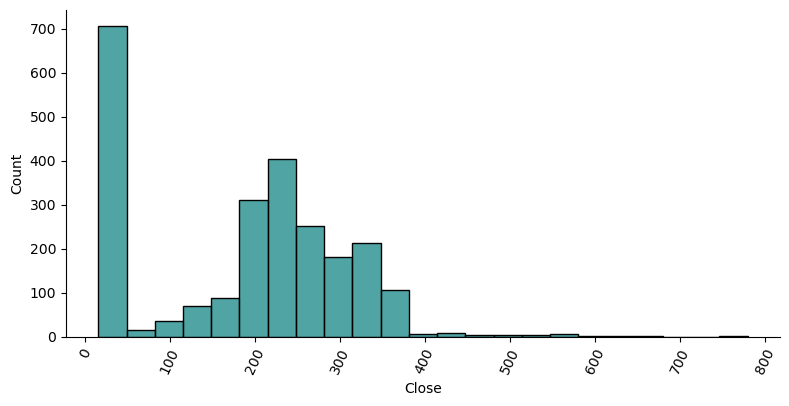

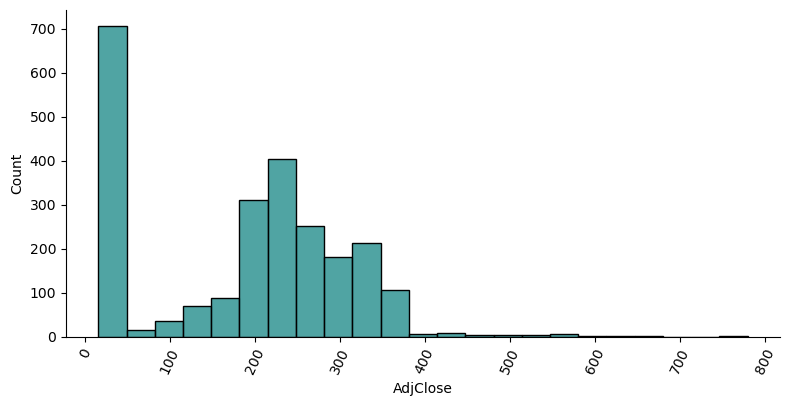

In [19]:
features_continuous = ['Open','High','Low','Close','AdjClose']
for feature in features_continuous:
  sns.displot(data=df, x=feature, height=4, aspect=2,color='#158685')
  plt.xticks(rotation=65)
  plt.show()

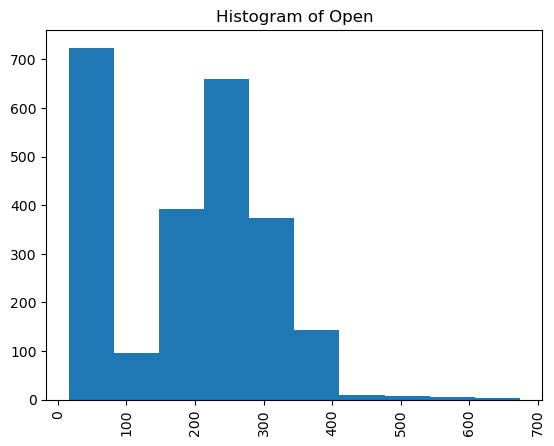

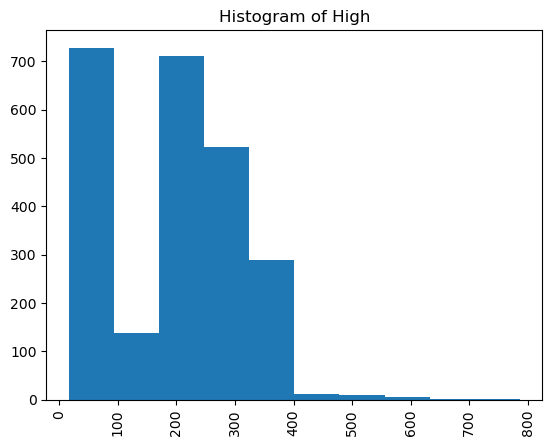

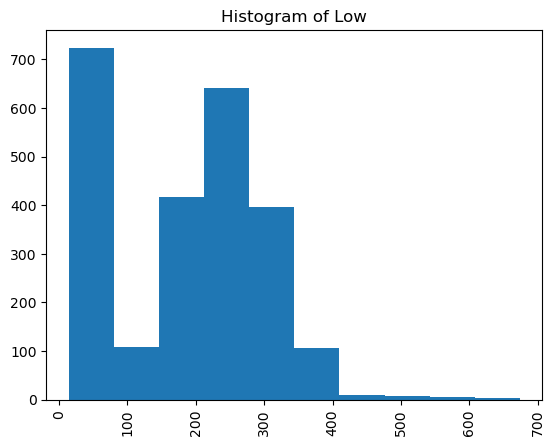

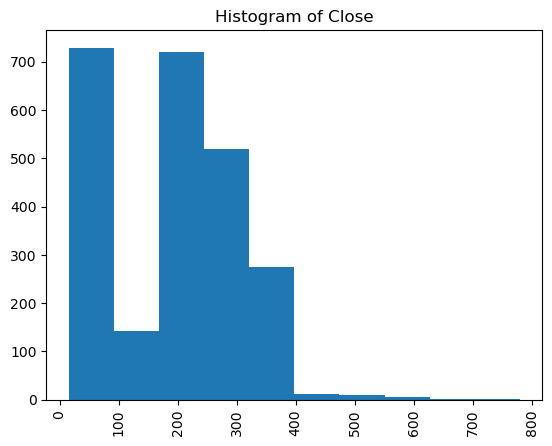

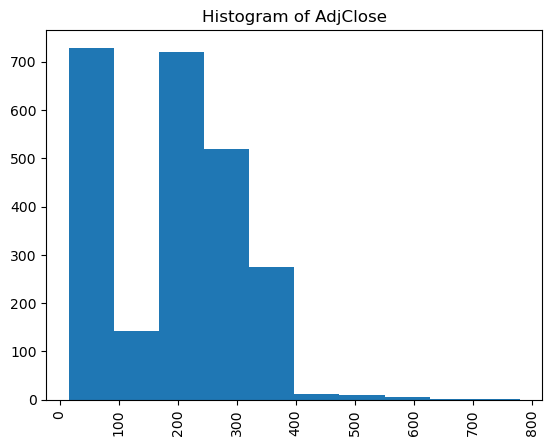

In [20]:
## Histogram

features = ['Open','High','Low','Close','AdjClose']
for feature in features:
  plt.hist(data=df, x=feature)
  plt.xticks(rotation=90)
  plt.title(f'Histogram of {feature}')
  plt.show()

In [21]:
## Adding column naming 'Tomorrow'

In [22]:
df['Tomorrow']=df["Close"].shift(-1)

In [23]:
df['Target']=(df["Tomorrow"]>df["Close"]).astype(int)

In [24]:
df

,Date,Open,High,Low,Close,AdjClose,Volume,Tomorrow,Target
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300,23.830000,0
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,21.959999,0
2,2010-01-07,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,19.200001,0
3,2010-02-07,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,16.110001,0
4,2010-06-07,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,15.800000,0
...,...,...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500,580.989990,1
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500,640.809998,1
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700,650.570007,1
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300,780.000000,1


###  Model Building
To develop the Alogrithms that can make predictions or classify new data based on patterns found in existing data. Its helps us for Prediction, Classifiction, Optimization, Insights.

### Considering model building for train dataset 
#### Dividing X & Y for building the model

In [25]:
# separating the data and labels
X = df.drop(columns = ['Date','Target'],axis=1)
Y = df['Target']

In [26]:
X

,Open,High,Low,Close,AdjClose,Volume,Tomorrow
0,19.000000,25.000000,17.540001,23.889999,23.889999,18766300,23.830000
1,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,21.959999
2,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,19.200001
3,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,16.110001
4,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,15.800000
...,...,...,...,...,...,...,...
2411,568.489990,576.809998,558.080017,566.900024,566.900024,11788500,580.989990
2412,575.690002,589.799988,567.429993,580.989990,580.989990,17801500,640.809998
2413,632.419983,650.880005,618.000000,640.809998,640.809998,29005700,650.570007
2414,640.000000,653.000000,632.520020,650.570007,650.570007,15719300,780.000000


In [27]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
2411    1
2412    1
2413    1
2414    1
2415    0
Name: Target, Length: 2416, dtype: int64

In [28]:
print(X.shape)

(2416, 7)


In [29]:
print(Y.shape)

(2416,)


### Reorganizing the data using Normalization for further Analysis

#### Normalization is a technique used in data preprocessing to scale and transform numerical features of a dataset to a standardized range, typically between 0 and 1 or -1 and 1, without changing the shape of the distribution of the data.

In [30]:
# Normalization function

def norm_func(i):
    x = (i - i.min())/(i.max() - i.min())
    return (x)

# Normalized data frame (considering the numerical part of data)
df = norm_func(X)

#### Using an imputer transformer in a pipeline to replace missing values with a valid value. 
#### Creates a pipeline with an imputer transformer,replaces missing values with the mean or median of the feature column. The pipeline can then be fit to the data

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC

# Create a pipeline with an imputer and an SVC model
pipe = Pipeline([
    ('imputer', SimpleImputer()),
    ('svc', SVC())
])

# Fit the pipeline to the data
pipe.fit(X, Y)

Pipeline(steps=[('imputer', SimpleImputer()), ('svc', SVC())])

### Dropping samples with missing values

In [32]:
import pandas as pd
from sklearn.svm import SVC

# Drop samples with missing values
X = X.dropna()
Y = Y[X.index]

# Fit the SVC model to the data
svc = SVC()
svc.fit(X, Y)

SVC()

In [33]:
# splitting the data into testing and training data.
# Module to split the data into training and testing sets.

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,stratify = Y)

In [34]:
print(X.shape, X_train.shape, X_test.shape)

(2415, 7) (1932, 7) (483, 7)


In [35]:
from sklearn.preprocessing import MinMaxScaler
scal=MinMaxScaler(feature_range=(0,1))

### It can improve the performance of  model, especially those that are sensitive to the scale of the input features (such as linear model)

In [36]:
train_array=scal.fit_transform(X_train)
train_array

array([[0.16712083, 0.16990116, 0.17036953, ..., 0.17056571, 0.13944511,
        0.1486391 ],
       [0.32516911, 0.32492103, 0.32875602, ..., 0.32438522, 0.13661615,
        0.27454855],
       [0.34292951, 0.33642378, 0.33411599, ..., 0.33227783, 0.16236024,
        0.26811044],
       ...,
       [0.54084248, 0.53712463, 0.54707387, ..., 0.5357846 , 0.106742  ,
        0.44438628],
       [0.4566409 , 0.45550545, 0.46158952, ..., 0.45725221, 0.13971505,
        0.37763676],
       [0.00769404, 0.00683565, 0.00931114, ..., 0.00795564, 0.        ,
        0.00727558]])

### Pipeline refers to a sequence of data processing components, The benefits of using pipelines include increased efficiency, reproducibility, and scalability, as well as the ability to automate and streamline the data analysis process

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the pipeline steps
steps = [('scaler', StandardScaler()),
         ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))]

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training data
pipeline.fit(X_train, Y_train)

# Predict the labels of the test data
Y_pred = pipeline.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8343685300207039


### By Evaluating the performance of the model by computing the accuracy score on the test data using Standard Scaler & Random Forest Classifier which shows the 
:- Accuracy of 0.834 ---